In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("bank.csv")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [7]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [8]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [9]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

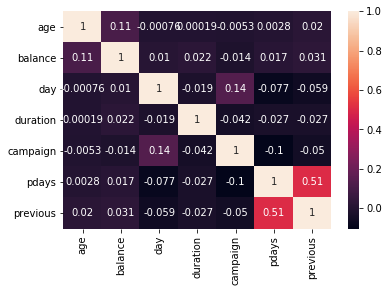

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['deposit']=le.fit_transform(df['deposit'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [18]:
x=df.iloc[:,:16].values


In [19]:
x

array([[ 59,   0,   1, ...,  -1,   0,   3],
       [ 56,   0,   1, ...,  -1,   0,   3],
       [ 41,   9,   1, ...,  -1,   0,   3],
       ...,
       [ 32,   9,   2, ...,  -1,   0,   3],
       [ 43,   9,   1, ..., 172,   5,   0],
       [ 34,   9,   1, ...,  -1,   0,   3]], dtype=int64)

In [20]:
y=df.iloc[:,16:17].values


In [21]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
one=OneHotEncoder()

In [24]:
z=one.fit_transform(x[:,1:2]).toarray()

In [25]:
z.shape

(11162, 12)

In [26]:
p=one.fit_transform(x[:,2:3]).toarray()
p.shape

(11162, 3)

In [27]:
r=one.fit_transform(x[:,3:4]).toarray()
r.shape

(11162, 4)

In [28]:
s=one.fit_transform(x[:,10:11]).toarray()
s.shape

(11162, 12)

In [29]:
t=one.fit_transform(x[:,8:9]).toarray()
t.shape

(11162, 3)

In [30]:
u=one.fit_transform(x[:,15:16]).toarray()
u.shape

(11162, 4)

In [31]:
x=df.drop(['marital','education','job','month','contact','poutcome'],axis=1)

In [32]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,0,2343,1,0,5,1042,1,-1,0,1
1,56,0,45,0,0,5,1467,1,-1,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,1
3,55,0,2476,1,0,5,579,1,-1,0,1
4,54,0,184,0,0,5,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,0
11158,39,0,733,0,0,16,83,4,-1,0,0
11159,32,0,29,0,0,19,156,2,-1,0,0
11160,43,0,0,0,1,8,9,2,172,5,0


In [33]:
x.shape

(11162, 11)

In [34]:
x=np.concatenate((z,x),axis=1)
x.shape

(11162, 23)

In [35]:
x=np.concatenate((p,x),axis=1)
x.shape

(11162, 26)

In [36]:
x=np.concatenate((r,x),axis=1)
x.shape

(11162, 30)

In [37]:
x=np.concatenate((s,x),axis=1)
x.shape

(11162, 42)

In [38]:
x=np.concatenate((t,x),axis=1)
x.shape

(11162, 45)

In [39]:
x=np.concatenate((u,x),axis=1)
x.shape

(11162, 49)

In [40]:
x.shape

(11162, 49)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
x_train.shape

(8929, 49)

In [44]:
x_test.shape

(2233, 49)

In [45]:
y_train.shape

(8929, 1)